In [47]:
import pandas as pd
df_rentalcars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_rentalcars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [49]:
df_rentalcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

제안 7: 지불 방식에 따른 고객 행동 분석
 - 문제 정의: 다양한 지불 방식(예: CMS, 카드 이체 등)을 사용하는 고객들의 행동 패턴을 분석합니다.
 - 배경: 지불 방식에 따른 고객 행동을 이해함으로써, 효율적인 결제 시스템을 설계하고 고객 서비스를 개선할 수 있습니다.

### 지불 방식 분포 확인
    - 가장 많은 지불 방식 :CMS > 카드이체 > 무통장 > 가상계좌 > 지로
    - 인사이트 : 타겟층 CMS 결제 고객으로 하는 이벤트 및 프로모션 수립해 카드이체 유도 고려

In [50]:
df_rentalcars['payment_type'].value_counts()

payment_type
CMS     32825
카드이체    15717
무통장      2085
가상계좌      612
지로         65
Name: count, dtype: int64

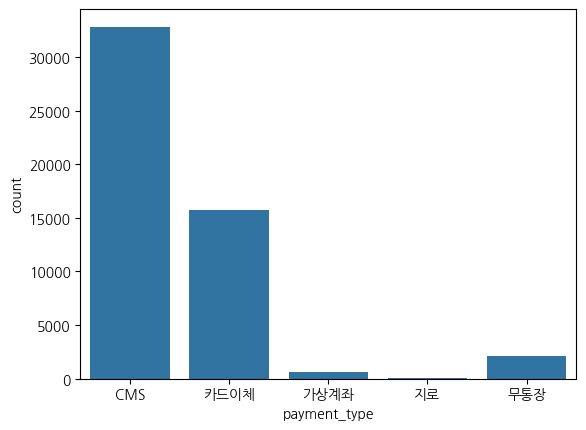

In [51]:
sns.countplot(data=df_rentalcars, x='payment_type')
plt.show()

### 나이별 지불 방식 분포 확인
- 기준 1(나이)
    + 자동차 많이 렌트 할 것 같은 연령대 : 20대 이상 60대 이하
- 기준 2(지불 방식)
    + 지불 방식 : CMS ~ 지로
- 확인 방법
    + 기준 1에 해당되는 데이터를 가지고 기준 2에 해당하는 항목 매치
    + 기준별 차트 출력

- 인사이트 : 40대 연령대에 지불 방식이 CMS가 가장 많이 차지 하므로 이 연령대에 혜택을 주어 카드 결제로 유도 필요

In [52]:
# 기준 1
#conditions_age = '20 <= age < 60'
#conditions_age = df_rentalcars['age'] >= 20 & 60
conditions_age = '20 <= age < 60'

# 기준2
conditions_CMS = 'payment_type == "CMS"'
conditions_카드이체 = 'payment_type == "카드이체"'
conditions_무통장 = 'payment_type == "무통장"'
conditions_가상계좌 = 'payment_type == "가상계좌"'
conditions_지로 = 'payment_type == "지로"'


In [53]:
# 연령별 CMS 분포 확인
bins = [20,30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_rentalcars_age_CMS['age_group'] = pd.cut(df_rentalcars_age_CMS['age'], bins=bins, labels=labels)
df_rentalcars_age_CMS.head()

NameError: name 'df_rentalcars_age_CMS' is not defined

In [38]:
df_rentalcars_age_CMS['age_group'].value_contents()

NameError: name 'df_rentalcars_age_CMS' is not defined

In [ ]:
#'20 <= age < 60' and 'payment_type == "CMS'
#df_rentalcars.query(f"{conditions_age} and {conditions_CMS}")
df_rentalcars.query(f"{conditions_age} and {conditions_CMS}")

ValueError: multi-line expressions are only valid in the context of data, use DataFrame.eval

In [18]:
df_rentalcars.query(f'{conditions_age} and {conditions_무통장}')

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
48200,66796990,멤버십,TA2,하이마트,2020-01-28,36,무통장,K1,56979,계약확정,0,없음,3.0,NaN,정상,20.0,1217.0
51301,66799197,렌탈,Promotion,홈쇼핑/방송,2020-02-03,39,무통장,K5,120900,해약확정,0,없음,1.0,NaN,해약,51.0,2217.0


In [20]:
df_rentalcars.query(f'{conditions_age} and {conditions_지로}')


,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage


In [ ]:
#'20 <= age < 60' and 'payment_type == "CMS'
#df_rentalcars.query(f"{conditions_age} and {conditions_CMS}")
df_rentalcars_age_카드이체 = df_rentalcars.query(f"{conditions_age} and {conditions_CMS}")

In [39]:
#연령별 카드이체 분포 확인
bins = [20,30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df_rentalcars_age_카드이체['age_group'] = pd.cut(df_rentalcars_age_카드이체['age'], bins=bins, labels=labels)
df_rentalcars_age_카드이체['age_group'].value_counts()
df_rentalcars_age_카드이체['age_group'].value_counts()

NameError: name 'df_rentalcars_age_카드이체' is not defined

### 금액별 지불 방식 분포
- 기준 1 (금액)
    + 큰 금액 기준 : 평균 이상
- 기준 2 (지불 방식)
- 접근 방식
    + 기준 1에 해당하는 기준2의 각 항목 매칭 
- 인사이트 : 결제시 CMS에 대한 (95279.7 ~ 119460.0 사이 대상 고객으로 프로모션 진행 고려)

In [42]:
amount_mean = df_rentalcars['amount'].mean()
amount_mean

93994.98002105099

In [43]:
# 해당 condition 작성
conditions_mean = f'amount > {amount_mean}'

In [54]:
df_rentalcars.query(f'{conditions_mean} and {conditions_CMS}')
df_rentalcars_mean_CMS.head(3)

NameError: name 'df_rentalcars_mean_CMS' is not defined

In [ ]:
df_rentalcars_mean_CMS['amount_group'] = pd.cut(df_rentalcars_mean_CMS['amount'], bins=5)

In [ ]:
df_rentalcars_mean_CMS['amount_group'].value_counts()

In [45]:
df_rentalcars.query(f'{conditions_mean} and {conditions_카드이체}')

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
6,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,98400,계약확정,0,없음,1.0,롯데카드,정상,59.0,2348.0
8,66758007,렌탈,Normal,서비스 방문,2019-10-20,60,카드이체,K3,102900,계약확정,0,없음,2.0,롯데카드,정상,61.0,2447.0
17,66755490,렌탈,Promotion,렌탈총판,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,47.0,1980.0
24,66755125,렌탈,Promotion,홈쇼핑/방송,2019-10-20,60,카드이체,K1,105900,계약확정,0,없음,1.0,롯데카드,정상,74.0,2947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51292,66792261,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,1.0,롯데카드,정상,46.0,1779.0
51295,66799197,렌탈,Promotion,영업방판,2020-02-03,39,카드이체,K5,120900,해약확정,0,없음,1.0,롯데카드,해약,48.0,1869.0
51296,66792778,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,롯데카드,정상,44.0,1947.0
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0
